**LICENCE PLATE DETECTION USING YOLOV8 -: In this project we will get the cropped images which contain the license plates**

**First Let us convert CSV file(which has dimentions of boxes) to YOLO format**

In [1]:
import os 
import pandas as pd 
from PIL import Image

In [ ]:


csv_path = "/kaggle/input/license-plate-prediction/Licplatesdetection_train.csv"       ##csv files containing data of xmin , ymin , xmax,ymax
img_dir = "/kaggle/input/license-plate-prediction/Licplatesdetection_train/license_plates_detection_train"   ##path of the folder that has training images
label_output_dir = "/kaggle/working/labels/train"           ##labels will be saved
image_output_dir = "/kaggle/working/images/train"           ##images will be saved

os.makedirs(label_output_dir, exist_ok=True)
os.makedirs(image_output_dir, exist_ok=True)

df = pd.read_csv(csv_path)

for filename, group in df.groupby("img_id"):
    image_path = os.path.join(img_dir, filename.strip())  # remove accidental whitespace

    print("Looking for:", image_path)  # Debug line

    if not os.path.exists(image_path):
        print(f"Image {filename} not found at {image_path}. Skipping.")
        continue

    os.system(f"cp '{image_path}' '{image_output_dir}/{filename}'")

    with Image.open(image_path) as img:
        w, h = img.size

    yolo_lines = []
    for _, row in group.iterrows():
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        x_center = ((xmin + xmax) / 2) / w
        y_center = ((ymin + ymax) / 2) / h
        bbox_width = (xmax - xmin) / w
        bbox_height = (ymax - ymin) / h
        yolo_lines.append(f"0 {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}")

    txt_filename = os.path.splitext(filename)[0] + ".txt"
    with open(os.path.join(label_output_dir, txt_filename), 'w') as f:
        f.write("\n".join(yolo_lines))


Looking for: /kaggle/input/license-plate-prediction/Licplatesdetection_train/license_plates_detection_train/1.jpg
Looking for: /kaggle/input/license-plate-prediction/Licplatesdetection_train/license_plates_detection_train/10.jpg
Looking for: /kaggle/input/license-plate-prediction/Licplatesdetection_train/license_plates_detection_train/100.jpg
Looking for: /kaggle/input/license-plate-prediction/Licplatesdetection_train/license_plates_detection_train/101.jpg
Looking for: /kaggle/input/license-plate-prediction/Licplatesdetection_train/license_plates_detection_train/102.jpg
Looking for: /kaggle/input/license-plate-prediction/Licplatesdetection_train/license_plates_detection_train/103.jpg
Looking for: /kaggle/input/license-plate-prediction/Licplatesdetection_train/license_plates_detection_train/104.jpg
Looking for: /kaggle/input/license-plate-prediction/Licplatesdetection_train/license_plates_detection_train/105.jpg
Looking for: /kaggle/input/license-plate-prediction/Licplatesdetection_trai

**Creating data.yaml file which has path of training and validation images and it also tells about number of classes**

In [17]:
data_yaml = """
train: /kaggle/working/images/train
val: /kaggle/working/images/train

nc: 1
names: ['license_plate']
"""

with open('/kaggle/working/data.yaml', 'w') as f:
    f.write(data_yaml)


**Let us start using our YOLOv8 model**

In [21]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')  ##using 'small' version

model.train(
    data='/kaggle/working/data.yaml',       ##path of yaml file created
    epochs=50,                              ##higher epochs usually leads to higher accuracy
    imgsz=640,                              ##by default image size used in yolo models is 640 X 640
    batch=16,
    workers=2
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 156MB/s]


Ultralytics 8.3.155 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

100%|██████████| 755k/755k [00:00<00:00, 17.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 69.6MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1828.8±933.3 MB/s, size: 105.6 KB)


train: Scanning /kaggle/working/labels/train... 900 images, 0 backgrounds, 0 corrupt: 100%|██████████| 900/900 [00:00<00:00, 1469.15it/s]

train: New cache created: /kaggle/working/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 740.4±345.1 MB/s, size: 117.2 KB)


val: Scanning /kaggle/working/labels/train.cache... 900 images, 0 backgrounds, 0 corrupt: 100%|██████████| 900/900 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.53G      1.247      2.629      1.107          8        640: 100%|██████████| 57/57 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.70it/s]


                   all        900        900      0.254      0.874      0.252      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.01G      1.136     0.8727      1.026          8        640: 100%|██████████| 57/57 [00:13<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.48it/s]

                   all        900        900       0.88      0.754      0.829      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.03G      1.207     0.8336      1.055          5        640: 100%|██████████| 57/57 [00:13<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.36it/s]


                   all        900        900      0.477      0.574      0.427      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.04G      1.158     0.7963      1.049          6        640: 100%|██████████| 57/57 [00:14<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.67it/s]

                   all        900        900      0.932      0.915       0.97      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.06G       1.12     0.7456      1.041          9        640: 100%|██████████| 57/57 [00:14<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.52it/s]

                   all        900        900      0.958      0.904      0.945      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.06G      1.071     0.6815      1.016          8        640: 100%|██████████| 57/57 [00:14<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.63it/s]

                   all        900        900      0.961      0.899      0.974      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.06G       1.08     0.6784       1.02          7        640: 100%|██████████| 57/57 [00:14<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.66it/s]

                   all        900        900      0.983      0.969      0.993      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.06G      1.034     0.6637      1.002          6        640: 100%|██████████| 57/57 [00:14<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.47it/s]

                   all        900        900      0.964      0.942      0.985        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.06G      1.041      0.624     0.9936          6        640: 100%|██████████| 57/57 [00:14<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.65it/s]

                   all        900        900      0.962      0.964      0.987      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.08G          1      0.613      0.984          6        640: 100%|██████████| 57/57 [00:14<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.62it/s]

                   all        900        900      0.981      0.986      0.994      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       5.1G     0.9928     0.6119     0.9815          9        640: 100%|██████████| 57/57 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.53it/s]

                   all        900        900      0.974      0.983      0.994      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.13G      1.002     0.5943     0.9806          4        640: 100%|██████████| 57/57 [00:14<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.66it/s]

                   all        900        900      0.984      0.987      0.994      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.13G      0.982     0.5826     0.9756          6        640: 100%|██████████| 57/57 [00:14<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.67it/s]

                   all        900        900      0.971      0.981      0.994      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.13G     0.9749     0.5878     0.9793          9        640: 100%|██████████| 57/57 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.45it/s]

                   all        900        900      0.971      0.989      0.994      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.13G     0.9645     0.5676     0.9683          6        640: 100%|██████████| 57/57 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.77it/s]

                   all        900        900      0.975      0.983      0.993      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.13G     0.9651     0.5636     0.9632          7        640: 100%|██████████| 57/57 [00:14<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.67it/s]

                   all        900        900       0.98      0.984      0.994      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.13G     0.9499     0.5589     0.9688          5        640: 100%|██████████| 57/57 [00:14<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.59it/s]

                   all        900        900      0.983      0.993      0.994      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.13G     0.9289     0.5426      0.954          7        640: 100%|██████████| 57/57 [00:14<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.64it/s]

                   all        900        900      0.985      0.894      0.939      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.13G     0.9034     0.5067      0.946          6        640: 100%|██████████| 57/57 [00:14<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.70it/s]

                   all        900        900      0.993      0.988      0.995       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.13G     0.9039     0.5231     0.9391         13        640: 100%|██████████| 57/57 [00:14<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.57it/s]

                   all        900        900      0.981      0.988      0.994      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.13G     0.8762      0.509     0.9474          5        640: 100%|██████████| 57/57 [00:14<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.69it/s]

                   all        900        900      0.984      0.997      0.994      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.13G     0.8551     0.4907     0.9359          7        640: 100%|██████████| 57/57 [00:14<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.74it/s]

                   all        900        900      0.994      0.995      0.995      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.13G     0.8916     0.5086     0.9422          6        640: 100%|██████████| 57/57 [00:14<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.62it/s]

                   all        900        900      0.994      0.993      0.995      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.13G     0.8948     0.4934     0.9417         10        640: 100%|██████████| 57/57 [00:14<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.80it/s]

                   all        900        900      0.998      0.994      0.995      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.13G     0.8838     0.4868      0.935          8        640: 100%|██████████| 57/57 [00:14<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.69it/s]

                   all        900        900      0.988          1      0.995      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.13G     0.8708     0.4843     0.9353          7        640: 100%|██████████| 57/57 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.73it/s]

                   all        900        900      0.996      0.998      0.995      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.13G      0.892      0.502     0.9378          7        640: 100%|██████████| 57/57 [00:14<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.68it/s]

                   all        900        900      0.995      0.996      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.13G     0.8523     0.4764     0.9367          5        640: 100%|██████████| 57/57 [00:14<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.70it/s]

                   all        900        900      0.996      0.994      0.995      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.13G     0.8373     0.4519     0.9195          7        640: 100%|██████████| 57/57 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.70it/s]

                   all        900        900      0.994      0.994      0.995      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.13G     0.8361     0.4507     0.9266         13        640: 100%|██████████| 57/57 [00:14<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.77it/s]

                   all        900        900      0.998      0.999      0.995      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.13G      0.807     0.4506     0.9194          9        640: 100%|██████████| 57/57 [00:14<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.70it/s]

                   all        900        900      0.996      0.997      0.995      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.13G     0.8336     0.4502     0.9193         15        640: 100%|██████████| 57/57 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.83it/s]

                   all        900        900      0.995      0.999      0.995      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.13G     0.8319     0.4501     0.9205          5        640: 100%|██████████| 57/57 [00:14<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.82it/s]

                   all        900        900      0.996      0.998      0.995      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.13G     0.8061     0.4378     0.9152         10        640: 100%|██████████| 57/57 [00:14<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.67it/s]

                   all        900        900      0.998      0.996      0.995       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.13G     0.7978     0.4295     0.9072         10        640: 100%|██████████| 57/57 [00:14<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.81it/s]

                   all        900        900      0.992      0.998      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.13G     0.7858     0.4307     0.9043         10        640: 100%|██████████| 57/57 [00:14<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.72it/s]

                   all        900        900      0.994      0.997      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.13G     0.8066     0.4292     0.9127          4        640: 100%|██████████| 57/57 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.63it/s]

                   all        900        900      0.995          1      0.995       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.13G     0.7885     0.4206     0.9127         14        640: 100%|██████████| 57/57 [00:14<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.74it/s]

                   all        900        900      0.998          1      0.995      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.13G     0.7739     0.4076     0.9037         11        640: 100%|██████████| 57/57 [00:14<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.75it/s]

                   all        900        900      0.997      0.999      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.13G      0.766      0.408     0.9033          8        640: 100%|██████████| 57/57 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.59it/s]

                   all        900        900      0.997          1      0.995      0.823


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.13G     0.7351     0.3769     0.8836          4        640: 100%|██████████| 57/57 [00:14<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.70it/s]

                   all        900        900      0.994      0.998      0.995      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.14G     0.7302     0.3757     0.8835          4        640: 100%|██████████| 57/57 [00:14<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.69it/s]

                   all        900        900      0.996      0.999      0.995      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.14G     0.7339     0.3678     0.8825          4        640: 100%|██████████| 57/57 [00:14<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.67it/s]

                   all        900        900      0.999      0.999      0.995      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.14G      0.719     0.3633     0.8783          3        640: 100%|██████████| 57/57 [00:14<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.71it/s]

                   all        900        900      0.998      0.997      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.14G     0.7115     0.3559     0.8727          4        640: 100%|██████████| 57/57 [00:14<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.74it/s]

                   all        900        900      0.997      0.999      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.15G      0.691     0.3449     0.8706          4        640: 100%|██████████| 57/57 [00:14<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.63it/s]

                   all        900        900      0.996          1      0.995      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.17G     0.6928      0.342     0.8781          4        640: 100%|██████████| 57/57 [00:14<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.76it/s]

                   all        900        900      0.998          1      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.22G     0.6891       0.34     0.8711          4        640: 100%|██████████| 57/57 [00:14<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.82it/s]

                   all        900        900      0.996          1      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.24G     0.6836     0.3355     0.8665          4        640: 100%|██████████| 57/57 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.70it/s]

                   all        900        900      0.998          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.24G      0.653     0.3225      0.866          4        640: 100%|██████████| 57/57 [00:14<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.78it/s]

                   all        900        900      0.999          1      0.995      0.864



50 epochs completed in 0.295 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.34it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        900        900      0.999          1      0.995      0.863
Speed: 0.1ms preprocess, 3.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x799858d8e210>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

**Loading the trained model**

In [ ]:
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')    ##load with best-weight

**Let's Run Inference on test images**

In [26]:
import cv2 
import os

# Directory paths
test_dir = '/kaggle/input/license-plate-prediction/test/test/test'  ##providing path of the test images
crop_output_dir = '/kaggle/working/cropped_plates'
os.makedirs(crop_output_dir, exist_ok=True)

# Run inference on each image
for img_file in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_file)
    results = model(img_path)

    for i, box in enumerate(results[0].boxes.data):
        x1, y1, x2, y2 = map(int, box[:4])
        img = cv2.imread(img_path)
        cropped = img[y1:y2, x1:x2]
        save_path = os.path.join(crop_output_dir, f"{os.path.splitext(img_file)[0]}_{i}.jpg")
        cv2.imwrite(save_path, cropped)


image 1/1 /kaggle/input/license-plate-prediction/test/test/test/1075.jpg: 640x480 1 license_plate, 12.1ms
Speed: 2.3ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /kaggle/input/license-plate-prediction/test/test/test/1031.jpg: 480x640 1 license_plate, 44.9ms
Speed: 2.2ms preprocess, 44.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/input/license-plate-prediction/test/test/test/1024.jpg: 384x640 1 license_plate, 44.0ms
Speed: 1.8ms preprocess, 44.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/license-plate-prediction/test/test/test/1009.jpg: 384x640 1 license_plate, 10.8ms
Speed: 2.0ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/license-plate-prediction/test/test/test/915.jpg: 384x640 1 license_plate, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shap

**To view a random cropped image**

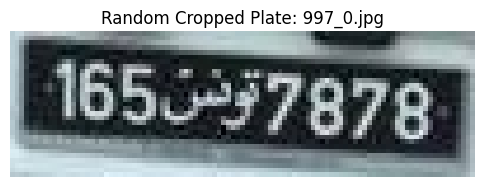

In [28]:
import matplotlib.pyplot as plt 
import random

def show_random_cropped_image(crop_dir):
    # Get all image filenames in the directory
    images = [f for f in os.listdir(crop_dir) if f.endswith(('.jpg', '.png'))]
    
    if not images:
        print("No images found in the directory.")
        return

    # Choose a random image
    random_img = random.choice(images)
    img_path = os.path.join(crop_dir, random_img)

    # Read and display the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

    plt.figure(figsize=(6, 4))
    plt.imshow(img)
    plt.title(f"Random Cropped Plate: {random_img}")
    plt.axis('off')
    plt.show()

# Call the function
show_random_cropped_image('/kaggle/working/cropped_plates')

**Let's Export our model for Deployment process**

In [31]:
model.export(format='onnx')

Ultralytics 8.3.155 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/kaggle/working/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (21.5 MB)
requirements: Ultralytics requirements ['onnxslim>=0.1.56', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 4.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.57...
ONNX: export success ✅ 7.6s, saved as '/kaggle/working/runs/detect/train/weights/best.onnx' (42.7 MB)

Export complete (8.3s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=/kaggle/working/runs/detect/train/weights/best.onnx imgsz=

'/kaggle/working/runs/detect/train/weights/best.onnx'

**Converting my 'cropped images' to a zip ffile so that I can perform 'Character Recogntion process' on a different notebook**

In [29]:
import shutil

# Zip the cropped image directory
shutil.make_archive('cropped_plates', 'zip', '/kaggle/working/cropped_plates')


'/kaggle/working/cropped_plates.zip'

**A new file named cropped_plated.zip is created**

In [30]:
##Downloading the ZIP file
from IPython.display import FileLink
FileLink('/kaggle/working/cropped_plates.zip')


/kaggle/working/cropped_plates.zip